In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import warnings
warnings.filterwarnings('ignore')

In [7]:
air_quality=pd.read_csv("/data.csv",encoding='cp1252')

In [8]:
air_quality.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [9]:
air_quality.fillna(0, inplace=True)
air_quality.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01


In [10]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
air_quality['si']=air_quality['so2'].apply(calculate_si)
df= air_quality[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [11]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
air_quality['ni']=air_quality['no2'].apply(calculate_ni)
df= air_quality[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [12]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
air_quality['rpi']=air_quality['rspm'].apply(calculate_si)
df= air_quality[['rspm','rpi']]
df.tail()

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [13]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
air_quality['spi']=air_quality['spm'].apply(calculate_spi)
df= air_quality[['spm','spi']]
df.tail()

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


In [14]:
#function to calculate the air quality index (AQI) of every data value
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
air_quality['AQI']=air_quality.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= air_quality[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [15]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [16]:
state=pd.read_csv("/poptable.csv")
state.head()
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [17]:
dff=pd.merge(state.set_index("state"),df.set_index("state"), right_index=True, left_index=True).reset_index()
dff.head()

,state,Unnamed: 0,latitude,longitude,sampling_date,si,ni,rpi,spi,AQI
0,Andhra Pradesh,2,14.750429,78.570026,February - M021990,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,2,14.750429,78.570026,February - M021990,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,2,14.750429,78.570026,February - M021990,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,2,14.750429,78.570026,March - M031990,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,2,14.750429,78.570026,March - M031990,5.875,9.375,0.0,0.0,9.375


In [1]:
!pip install basemap

In [2]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
m = Basemap(projection='mill',llcrnrlat=5,urcrnrlat=40, llcrnrlon=60,urcrnrlon=110,lat_ts=20,resolution='c')

In [18]:
longitudes = dff["longitude"].tolist()
latitudes = dff["latitude"].tolist()
x,y = m(longitudes,latitudes)

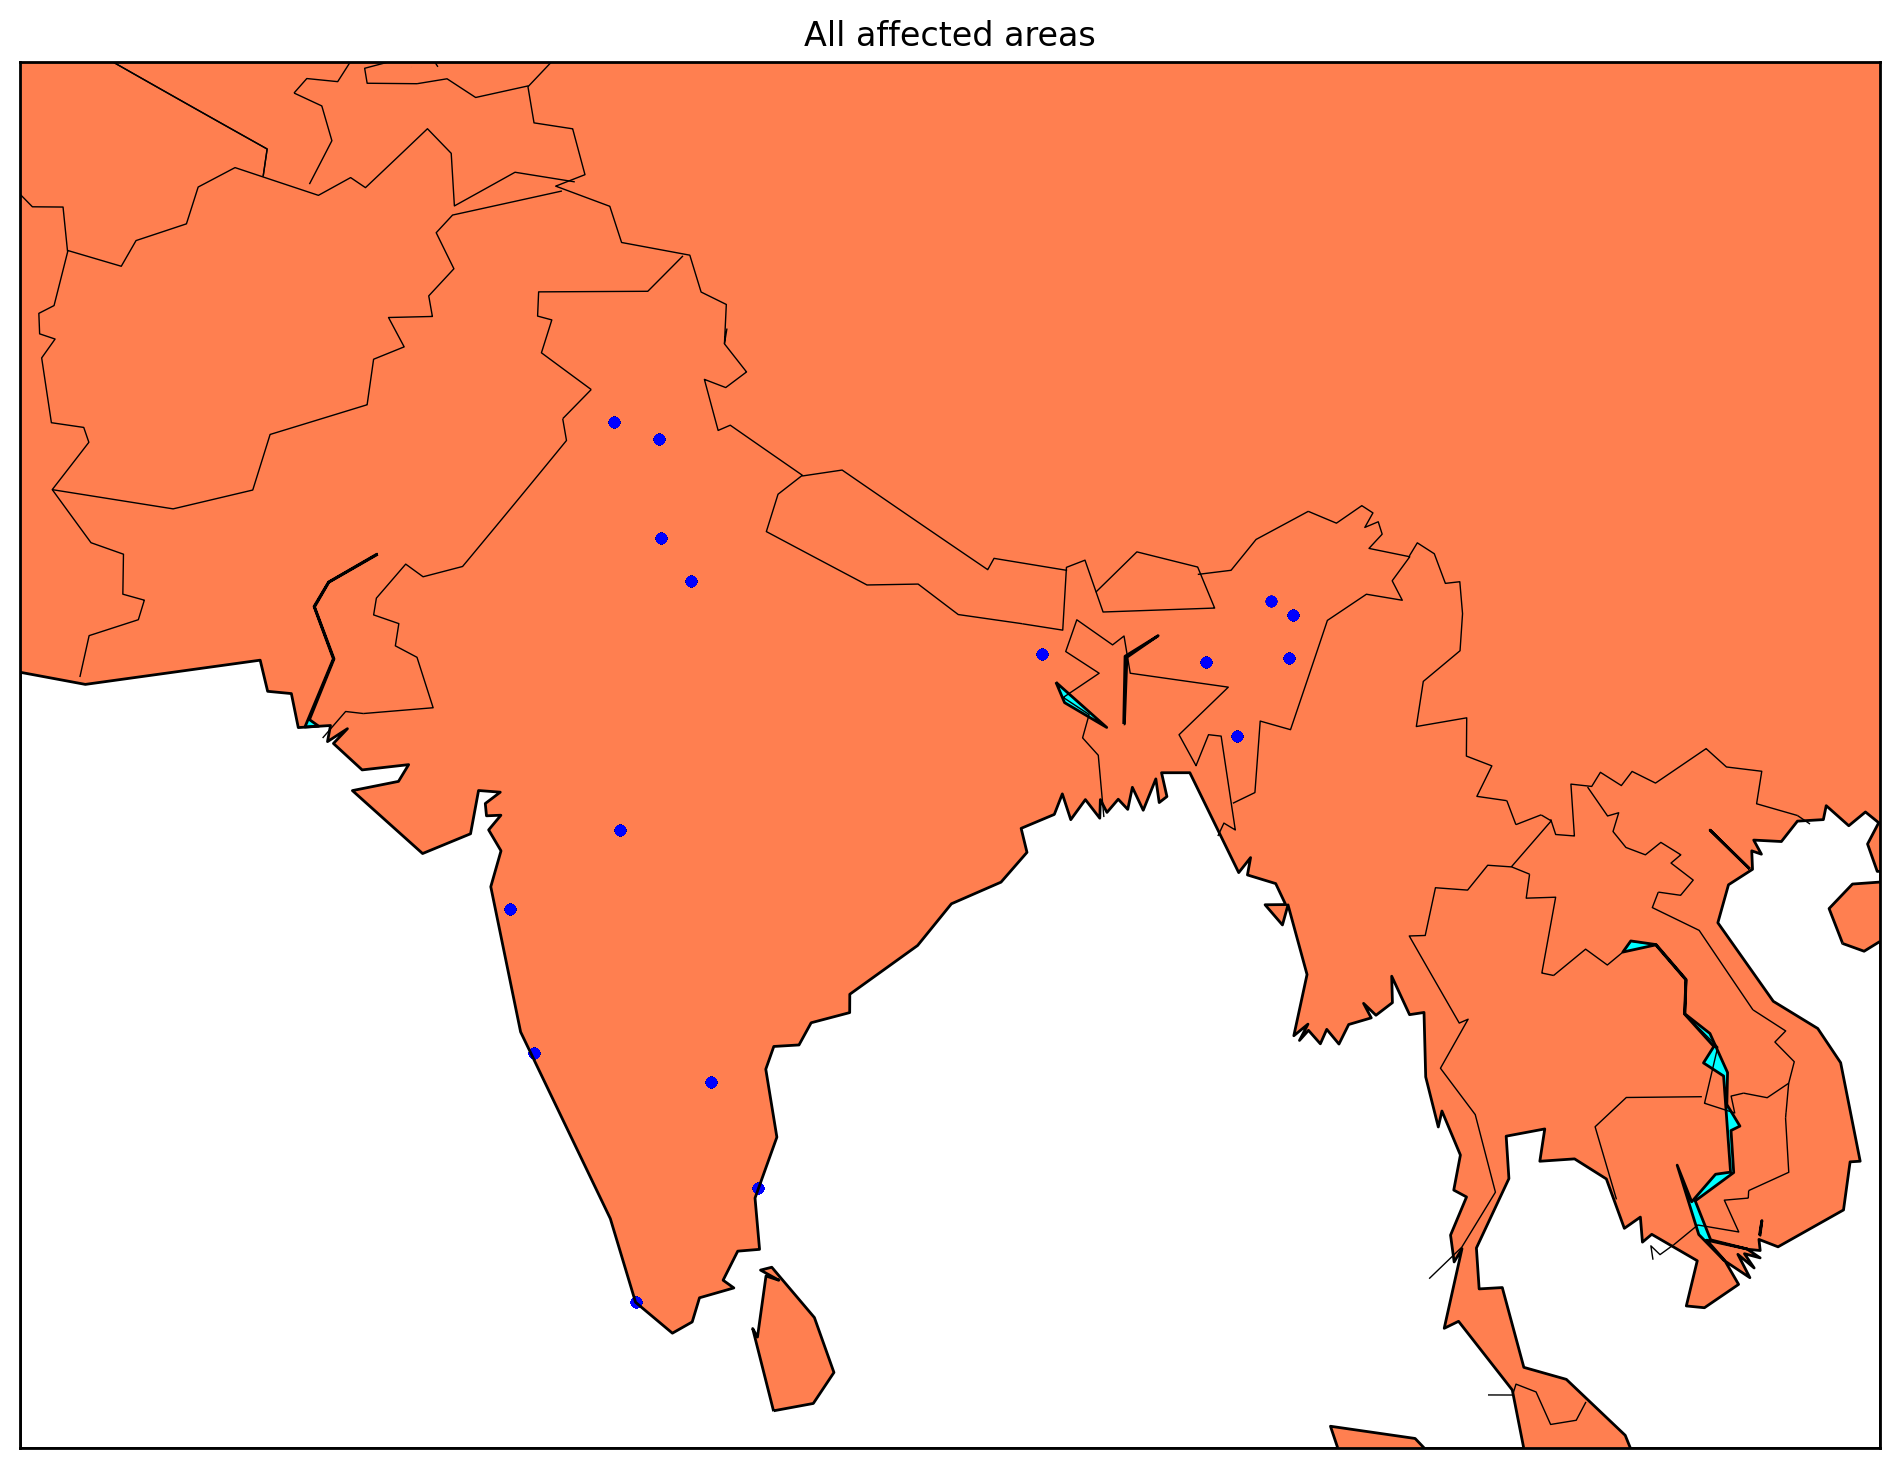

In [19]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()




<Axes: xlabel='year', ylabel='AQI'>

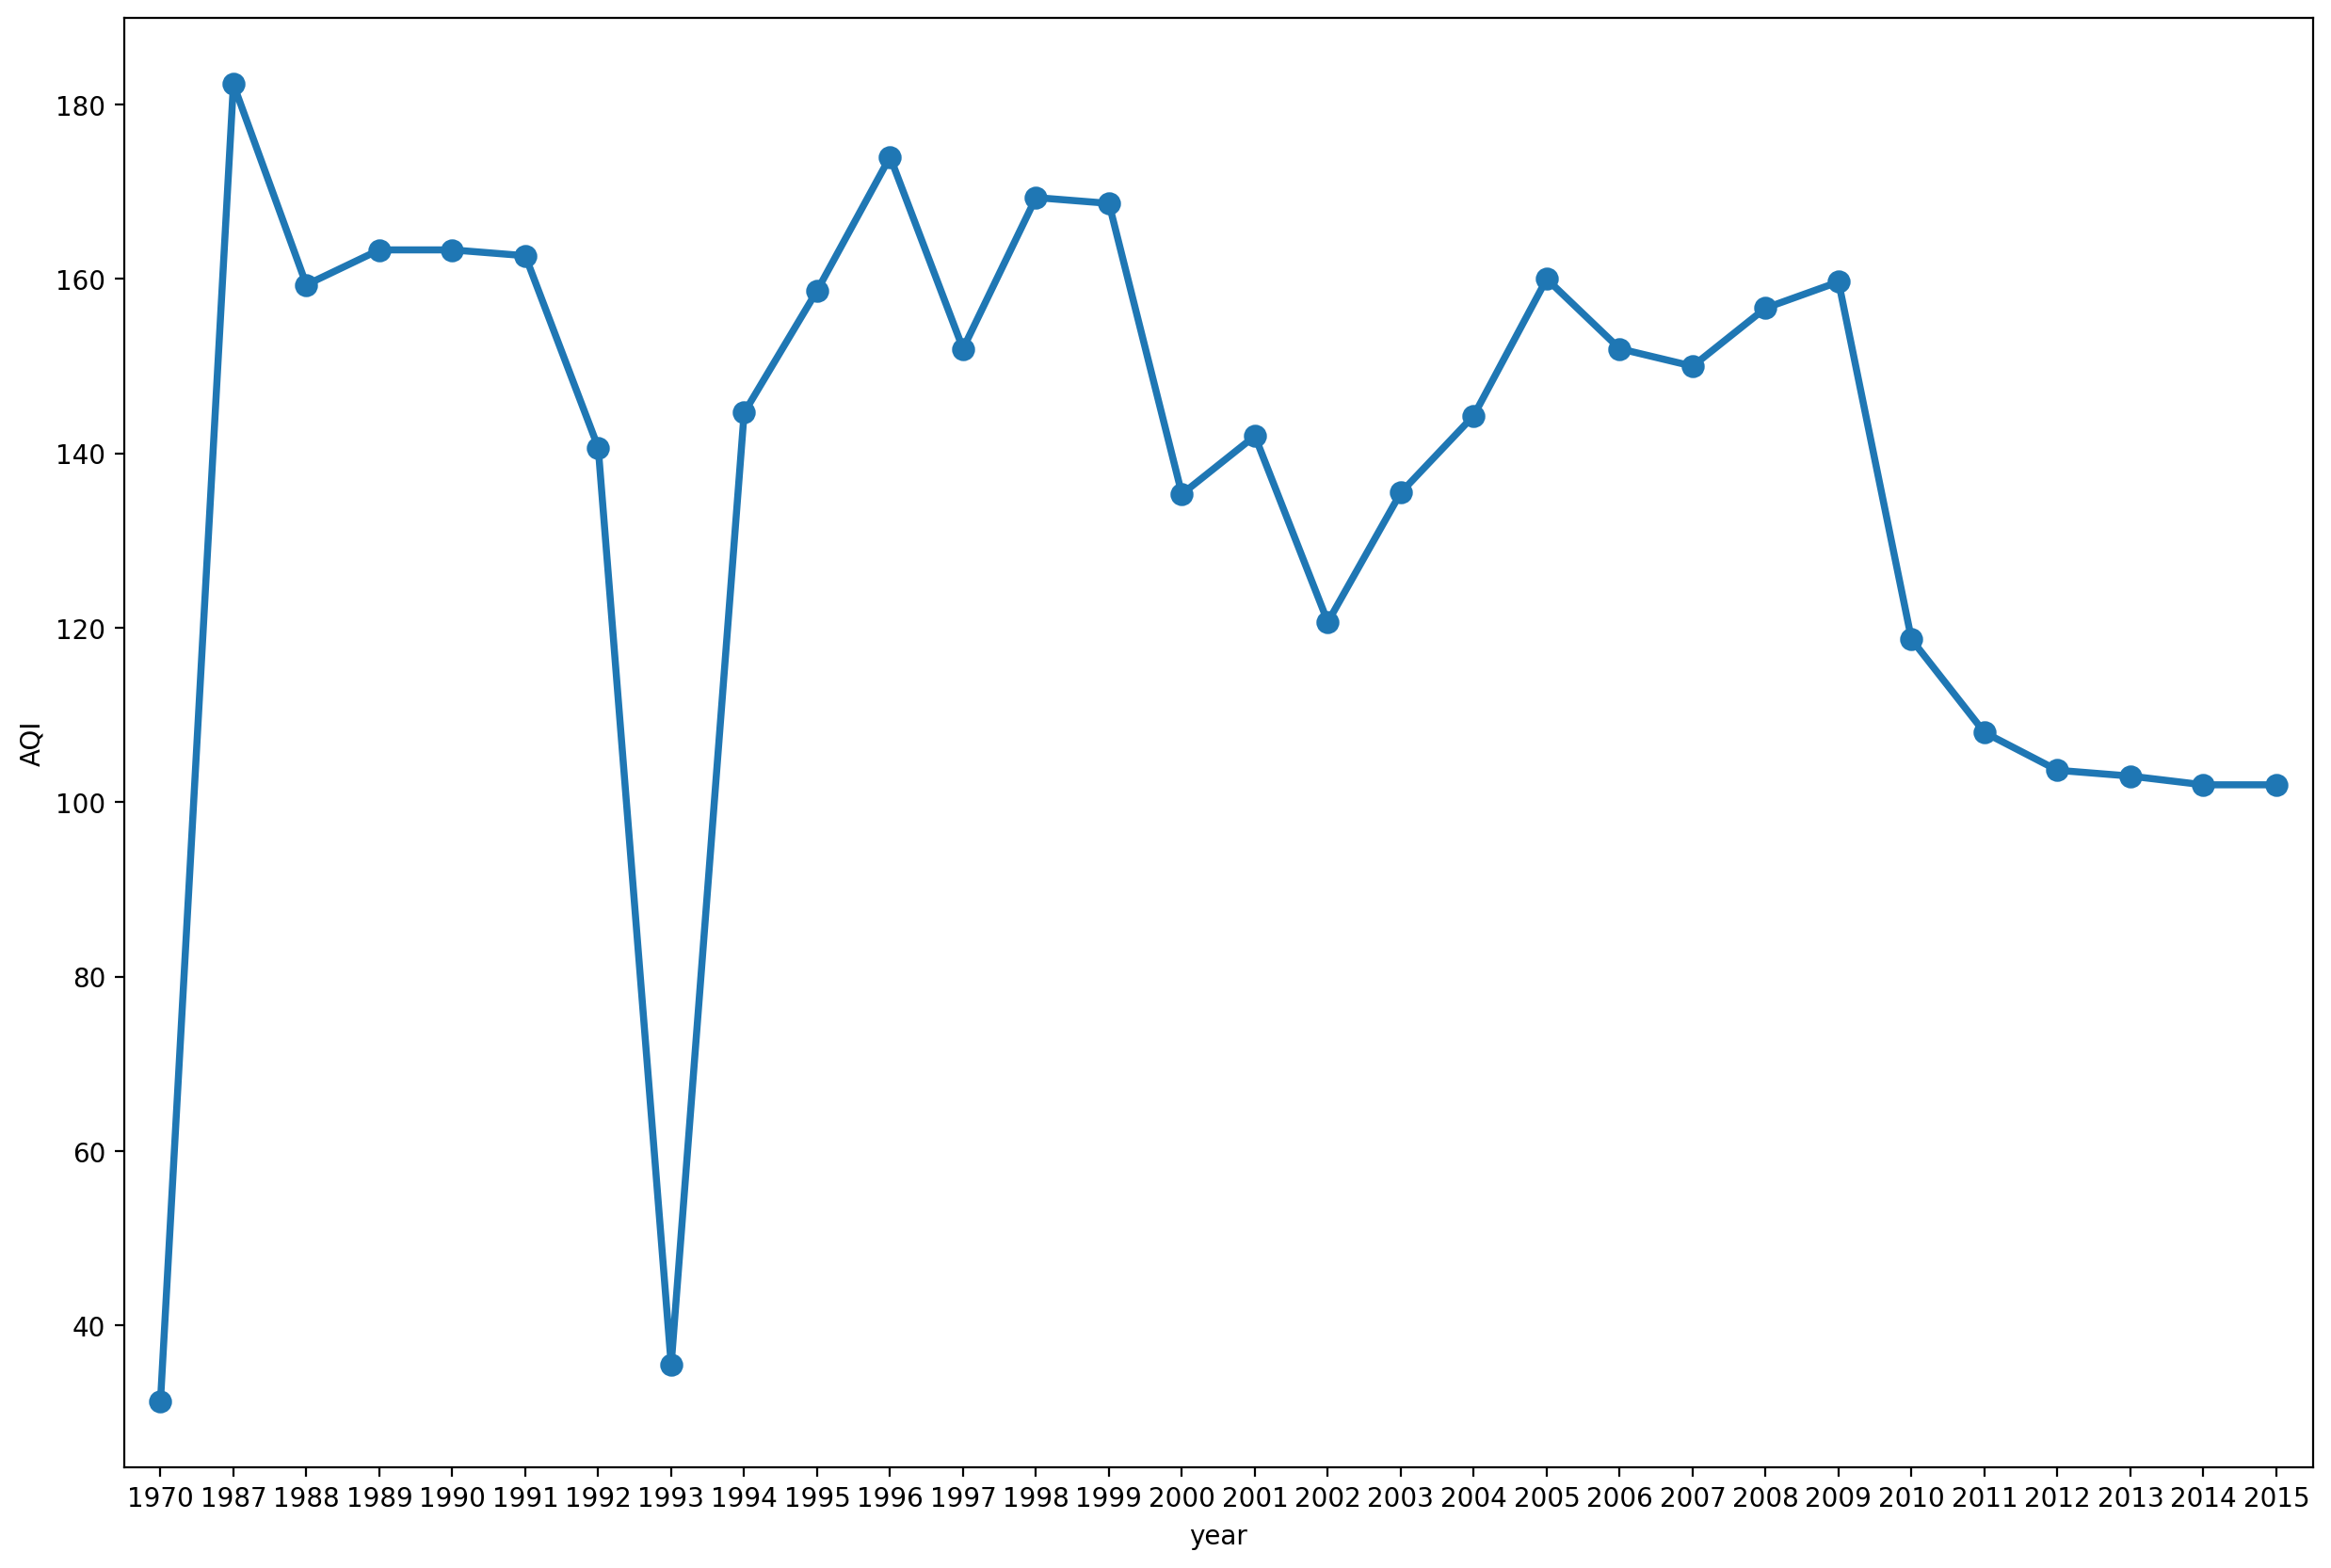

In [20]:
air_quality['date'] = pd.to_datetime(air_quality['date'],format='%Y-%m-%d')
air_quality['year'] = air_quality['date'].dt.year
air_quality['year'] = air_quality['year'].fillna(0.0).astype(int)
air_quality = air_quality[(air_quality['year']>0)]
df = air_quality[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

In [21]:
#setting up date parameter
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=air_quality[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(10)

,AQI,date
435732,121.666667,2015-12-09
435733,127.000000,2015-12-12
435734,122.666667,2015-12-15
435735,117.000000,2015-12-18
435736,120.000000,2015-12-21
435737,121.000000,2015-12-24
435738,130.333333,2015-12-29
435739,0.000000,1970-01-01
435740,0.000000,1970-01-01
435741,0.000000,1970-01-01


In [22]:
#Calculating the yearly mean for the data
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

date
1970-01-31    49.654762
1970-02-28          NaN
1970-03-31          NaN
1970-04-30          NaN
1970-05-31          NaN
Freq: M, Name: AQI, dtype: float64

In [23]:
#preprocessing the data values
air_quality=df.reset_index(level=0, inplace=False)
air_quality= air_quality[np.isfinite(air_quality['AQI'])]
air_quality=air_quality[air_quality.date != '1970-01-31']
air_quality = air_quality.reset_index(drop=True)
air_quality.head()

,date,AQI
0,1987-01-31,242.438652
1,1987-02-28,235.787929
2,1987-03-31,294.558772
3,1987-04-30,202.012681
4,1987-05-31,307.991667


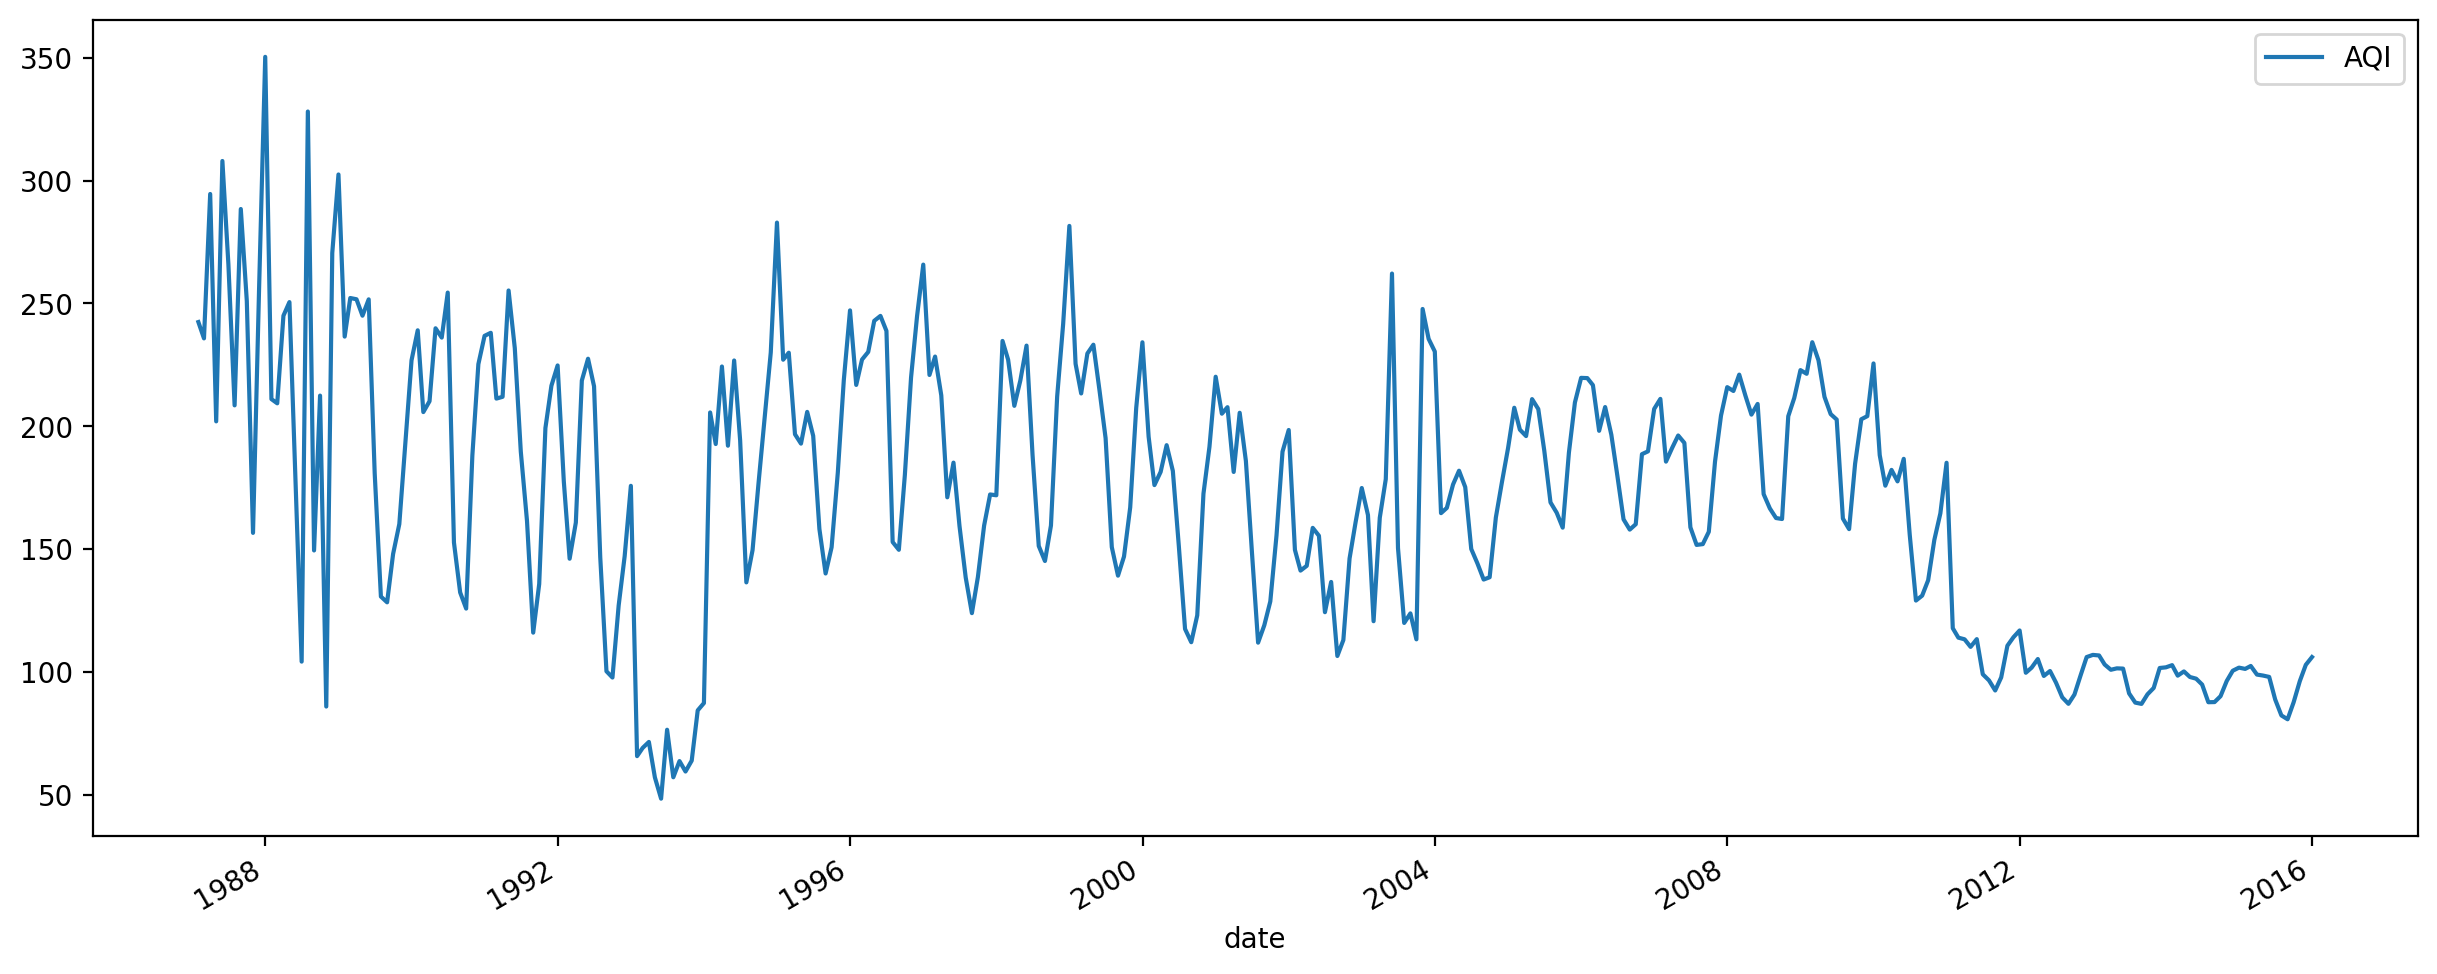

In [24]:
#visualizing the processed data of AQI
df=air_quality.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

In [25]:
#spliting dataframes into test and train
n = df.shape[0]
train_size = 0.65
features_dataframe = df.sort_values('date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

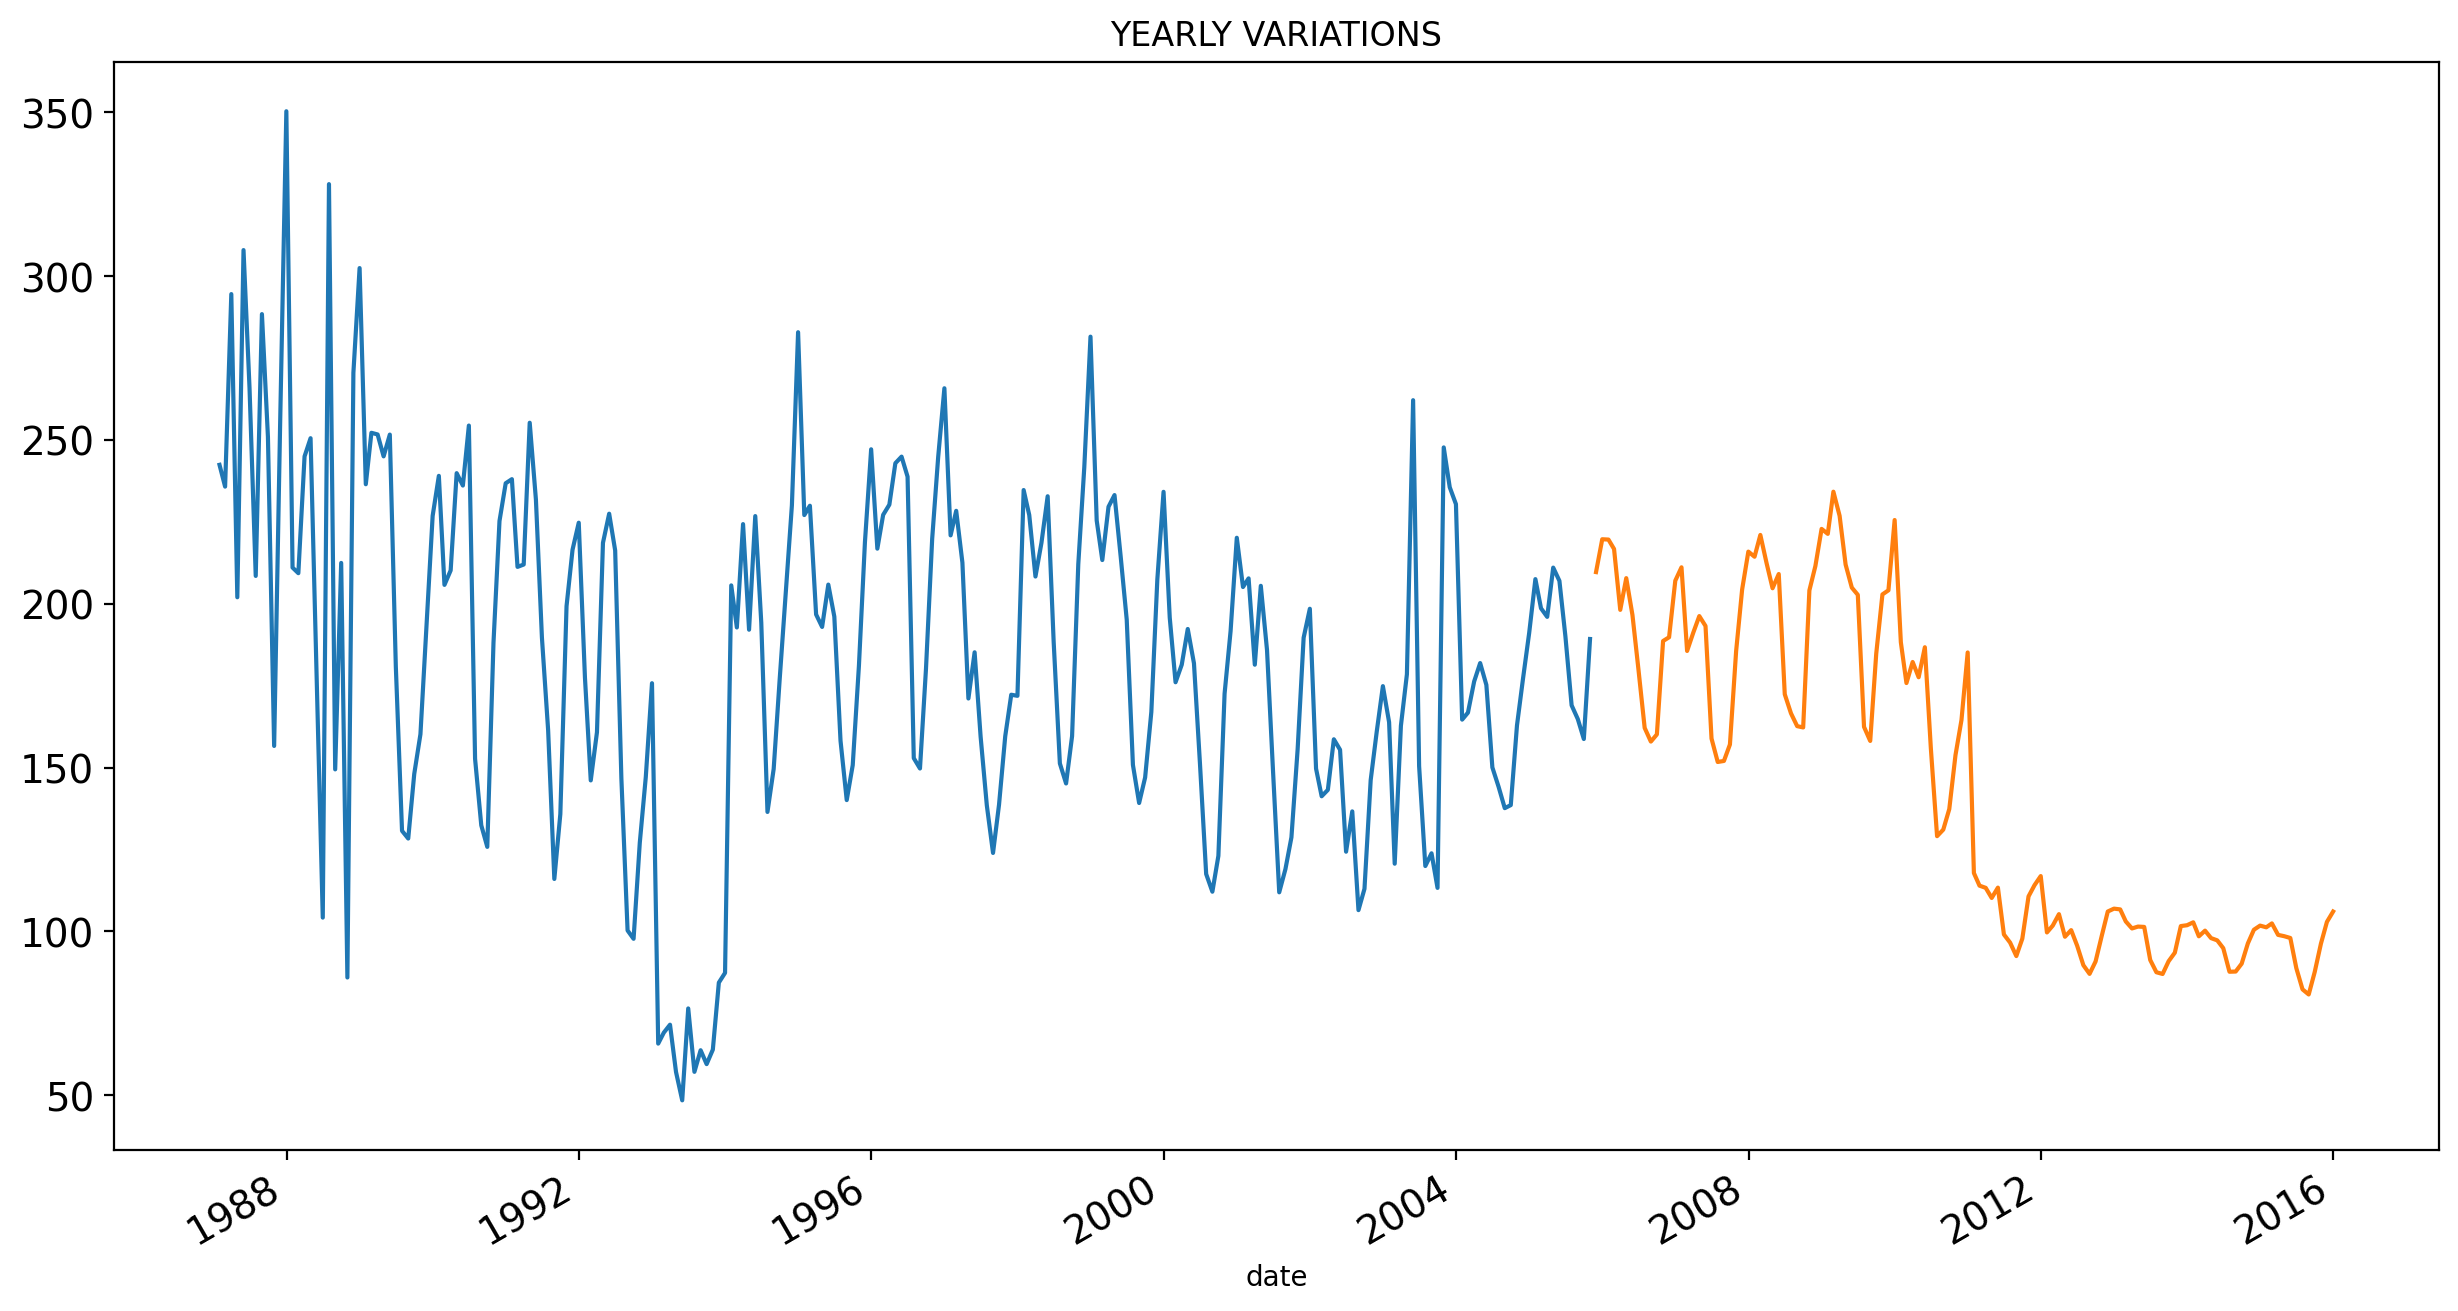

In [26]:
#plotting the yearly variations of AQI
train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

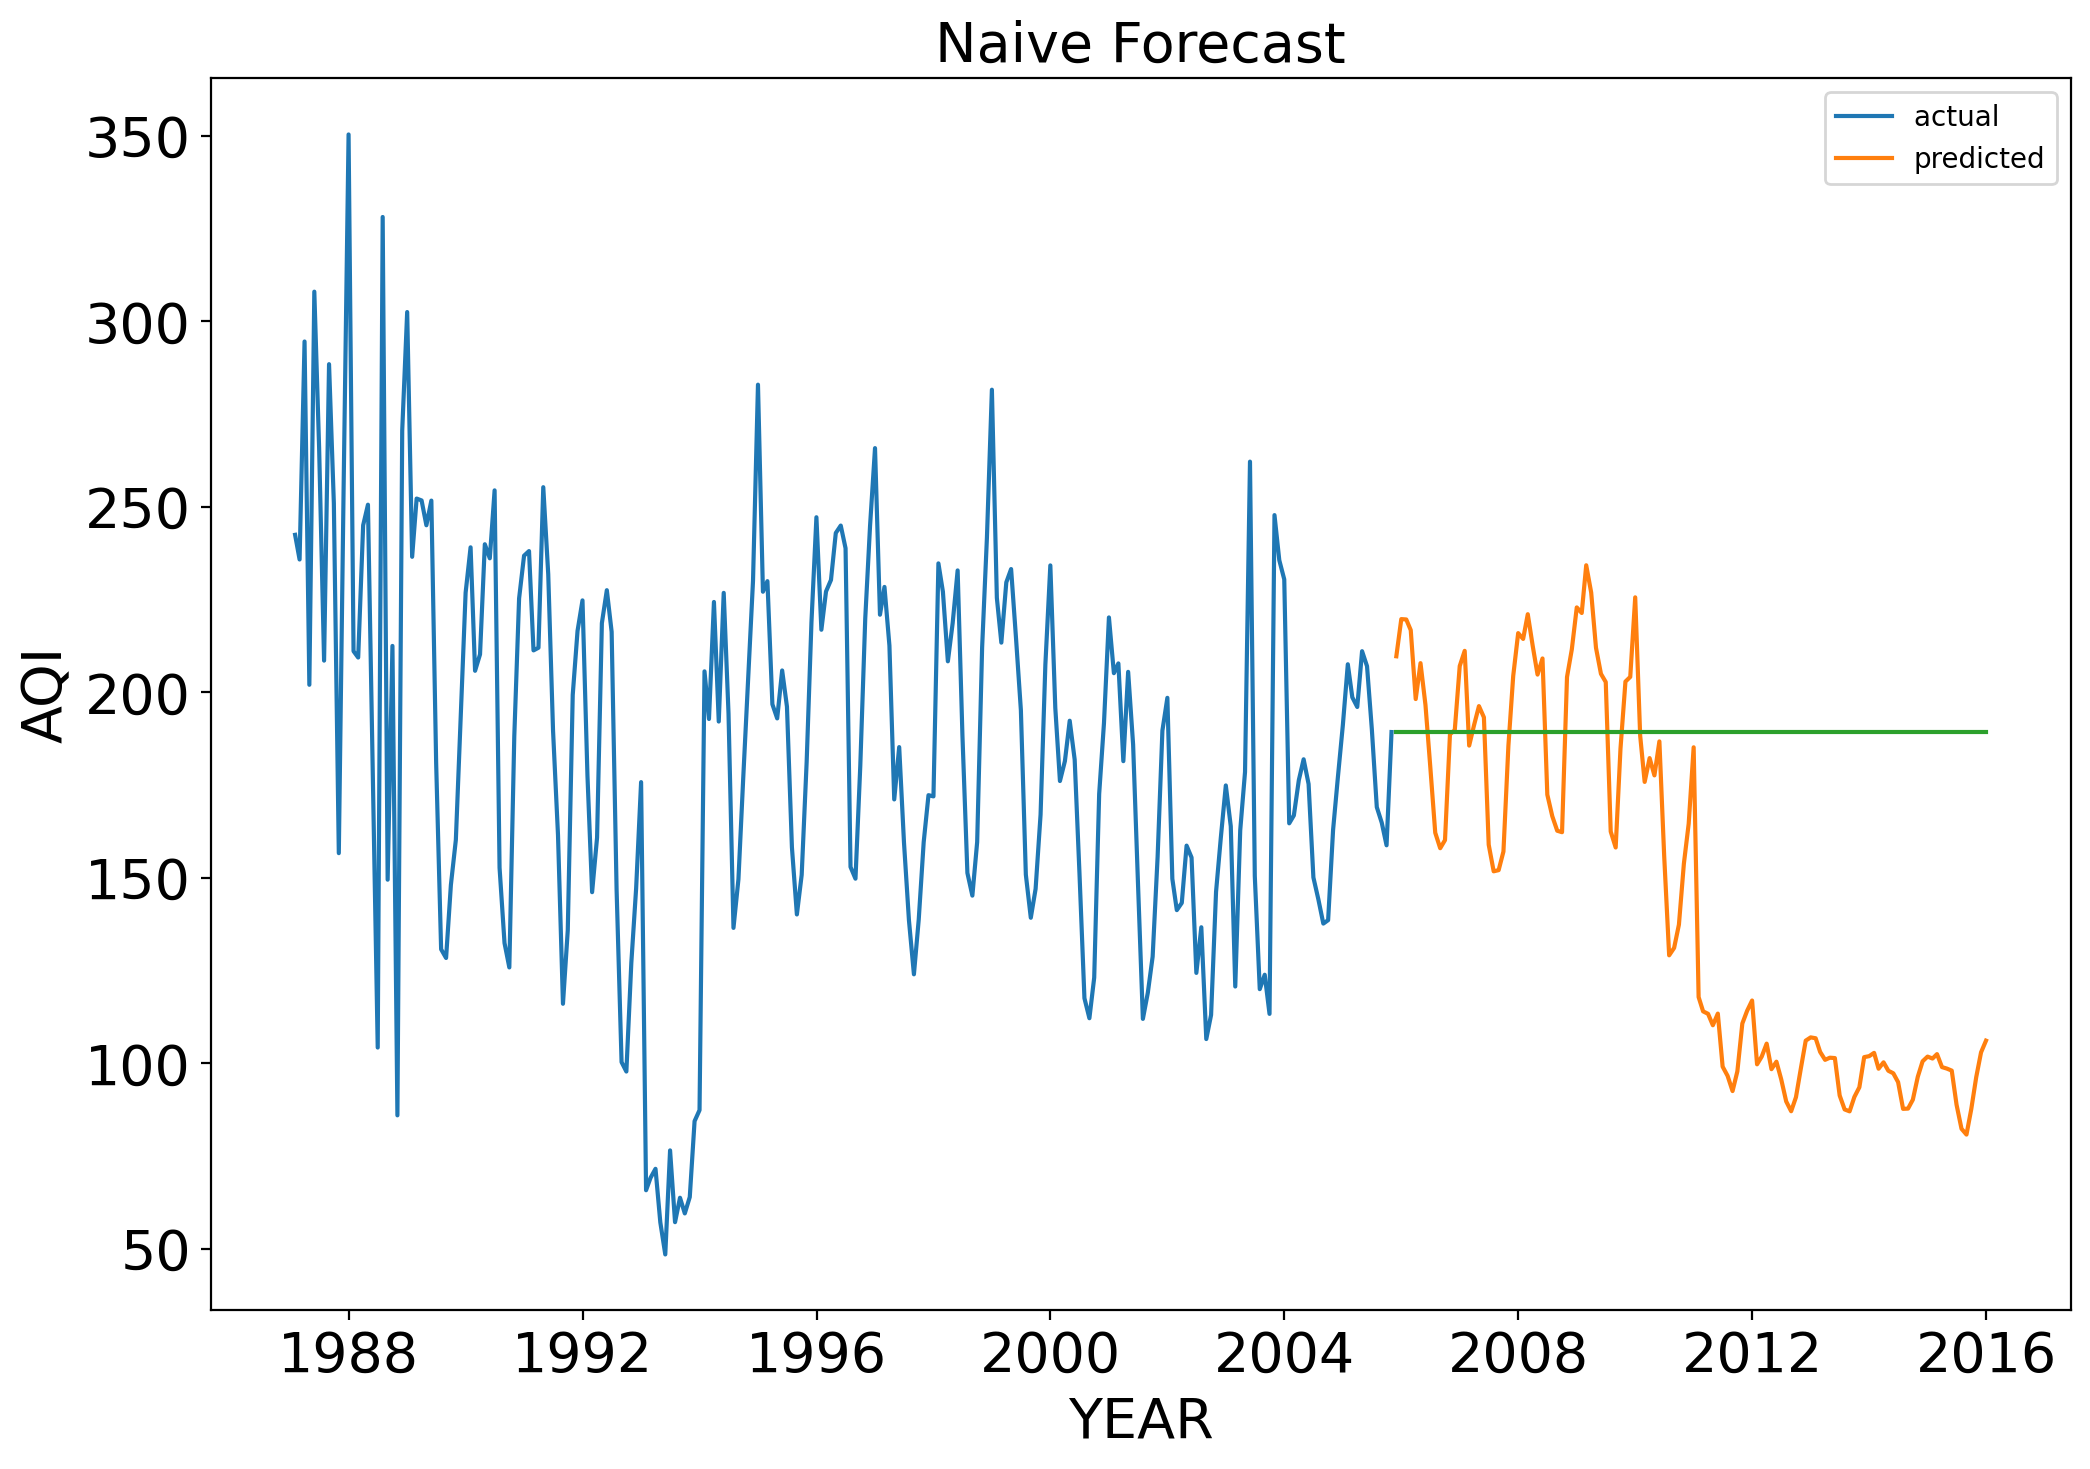

In [27]:
#Naive Forecast Approach to find the variations(trend)
dd= np.asarray(train.AQI)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [28]:
#resampling the data to predict monthly AQI of india
df=air_quality[['AQI','date']]
df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))["AQI"].mean()
df.count()

AQI     346
date    346
dtype: int64

In [29]:
#splitting the sampling date into month and year accordingly
air_quality['month'] = air_quality['date'].dt.month
air_quality['year'] = air_quality['date'].dt.year
air_quality=air_quality[['AQI','date','month','year']]
air_quality.head()

,AQI,date,month,year
0,242.438652,1987-01-31,1,1987
1,235.787929,1987-02-28,2,1987
2,294.558772,1987-03-31,3,1987
3,202.012681,1987-04-30,4,1987
4,307.991667,1987-05-31,5,1987


In [30]:
#Appling BOXPLOT analysis
df = air_quality[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()

,year,AQI
count,29.000000,29.000000
mean,2001.000000,170.349180
std,8.514693,45.446218
min,1987.000000,67.039013
25%,1994.000000,161.798549
50%,2001.000000,183.596502
75%,2008.000000,201.085921
max,2015.000000,254.890756


<Axes: xlabel='AQI'>

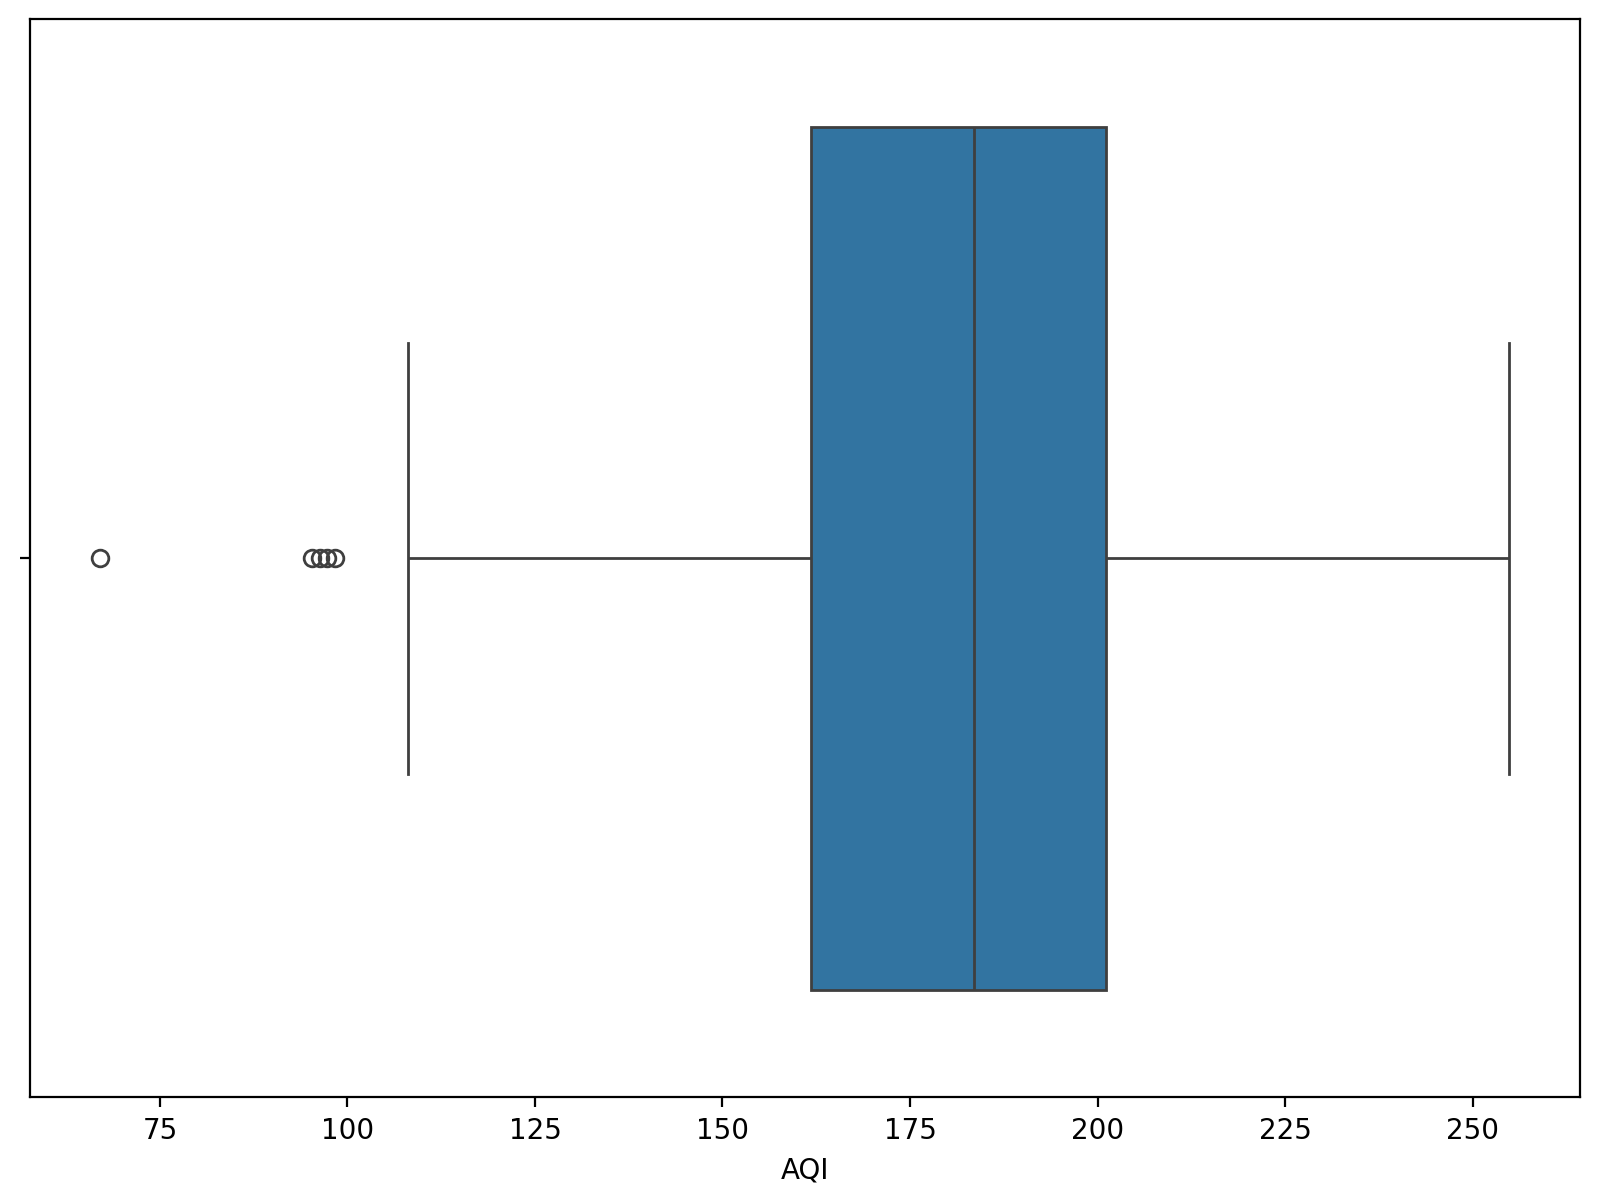

In [31]:
sns.boxplot(x=df['AQI'])

In [33]:
#removing Outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >160]
df=df[df.AQI <205]

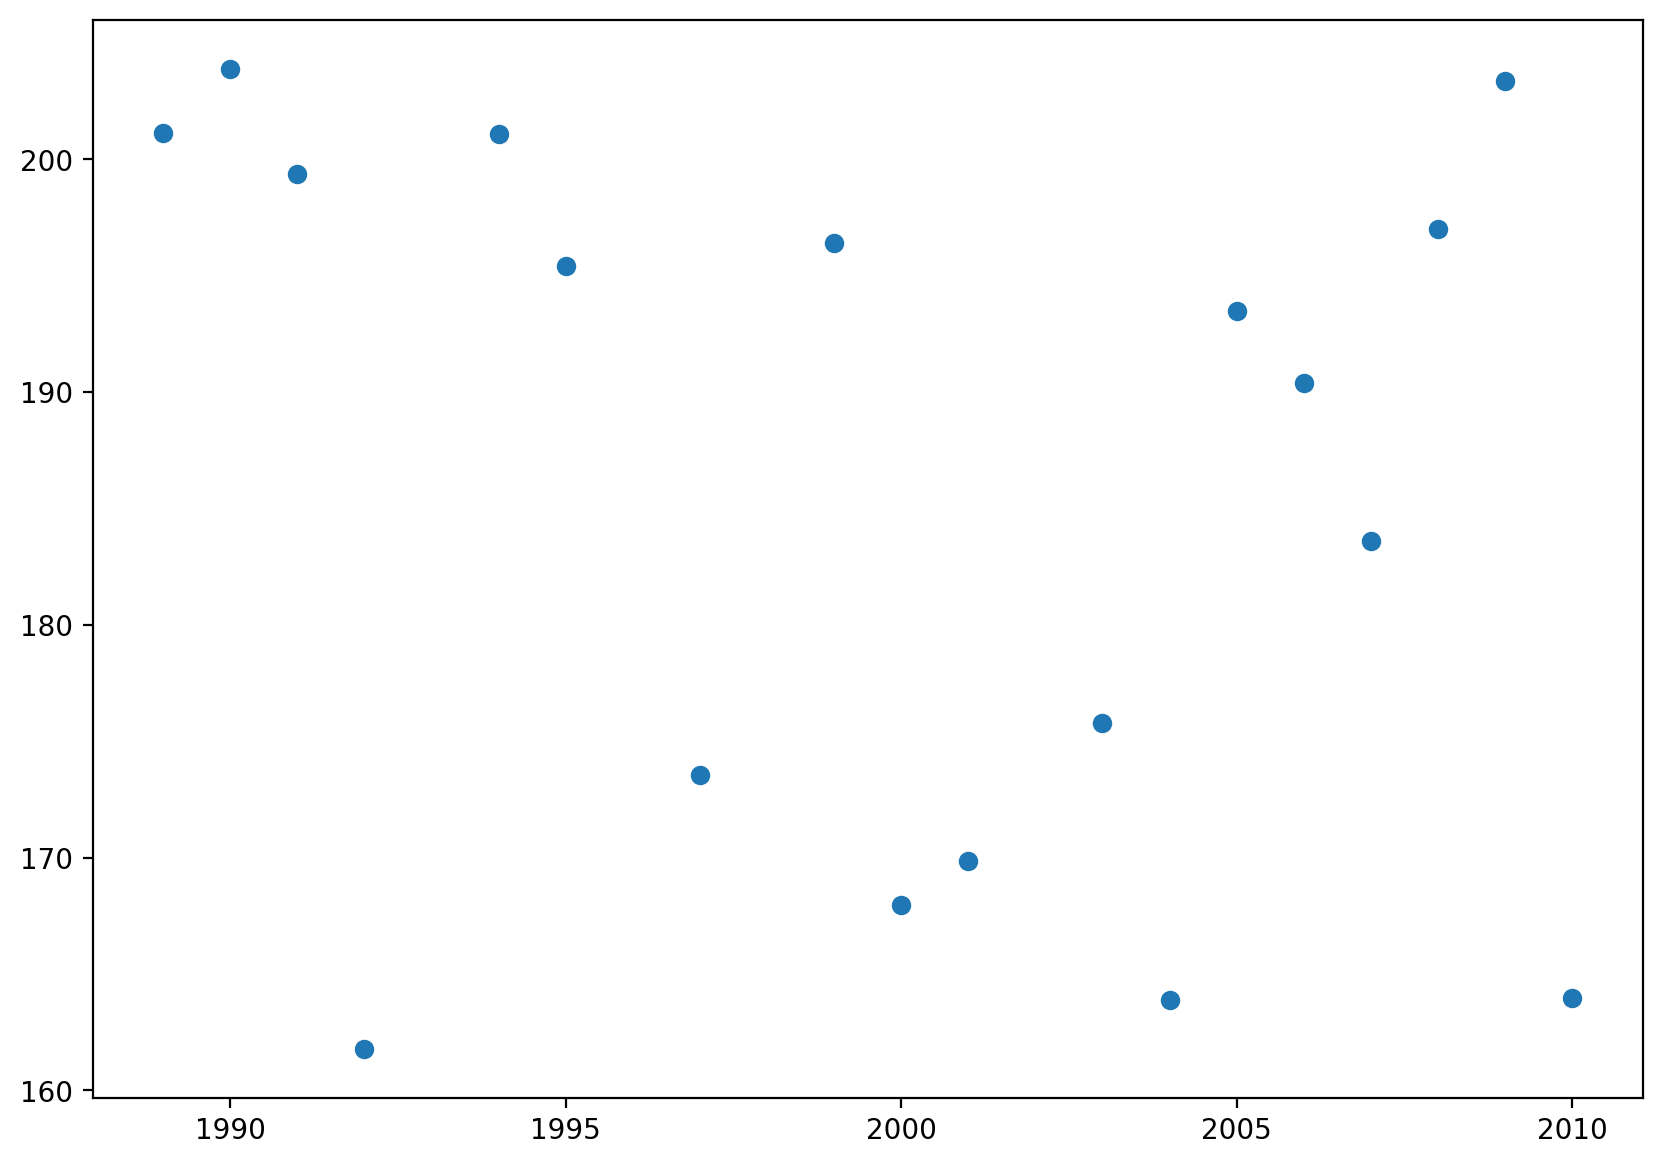

In [34]:
#scatter plot of data points
cols =['year']
y = df['AQI']
x=df[cols]
plt.scatter(x,y)
plt.show()

In [35]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.44161008],
       [ 1.        ,  1.29744907],
       [ 1.        ,  1.15328806],
       [ 1.        ,  1.00912705],
       [ 1.        ,  0.86496605],
       [ 1.        ,  0.72080504],
       [ 1.        ,  0.57664403],
       [ 1.        ,  0.43248302],
       [ 1.        ,  0.14416101],
       [ 1.        ,  0.        ],
       [ 1.        , -0.14416101],
       [ 1.        , -0.43248302],
       [ 1.        , -0.72080504],
       [ 1.        , -0.86496605],
       [ 1.        , -1.15328806],
       [ 1.        , -1.29744907],
       [ 1.        , -1.44161008],
       [ 1.        , -1.58577108]])

In [36]:
# Applying GRADIENT DESCENT
alpha = 0.1
iterations = 3000
m = y.size
np.random.seed(4)
theta = np.random.rand(2)

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)

    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 185.66, -3.79


In [37]:
#Predicted value
newB=[185.66, -3.79 ]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
x=pd.concat([df, dt], axis=1)
x


,year,AQI,Actual,Predicted
23,2010,163.964806,163.964806,180.196298
22,2009,203.347868,203.347868,180.742668
21,2008,197.014484,197.014484,181.289038
20,2007,183.596502,183.596502,181.835408
19,2006,190.387451,190.387451,182.381779
18,2005,193.469472,193.469472,182.928149
17,2004,163.878325,163.878325,183.474519
16,2003,175.780440,175.780440,184.020889
14,2001,169.852132,169.852132,185.113630
13,2000,167.982871,167.982871,185.660000


In [38]:
#calculating the root mean squared error for the predicted AQi values
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

14.555309133802474


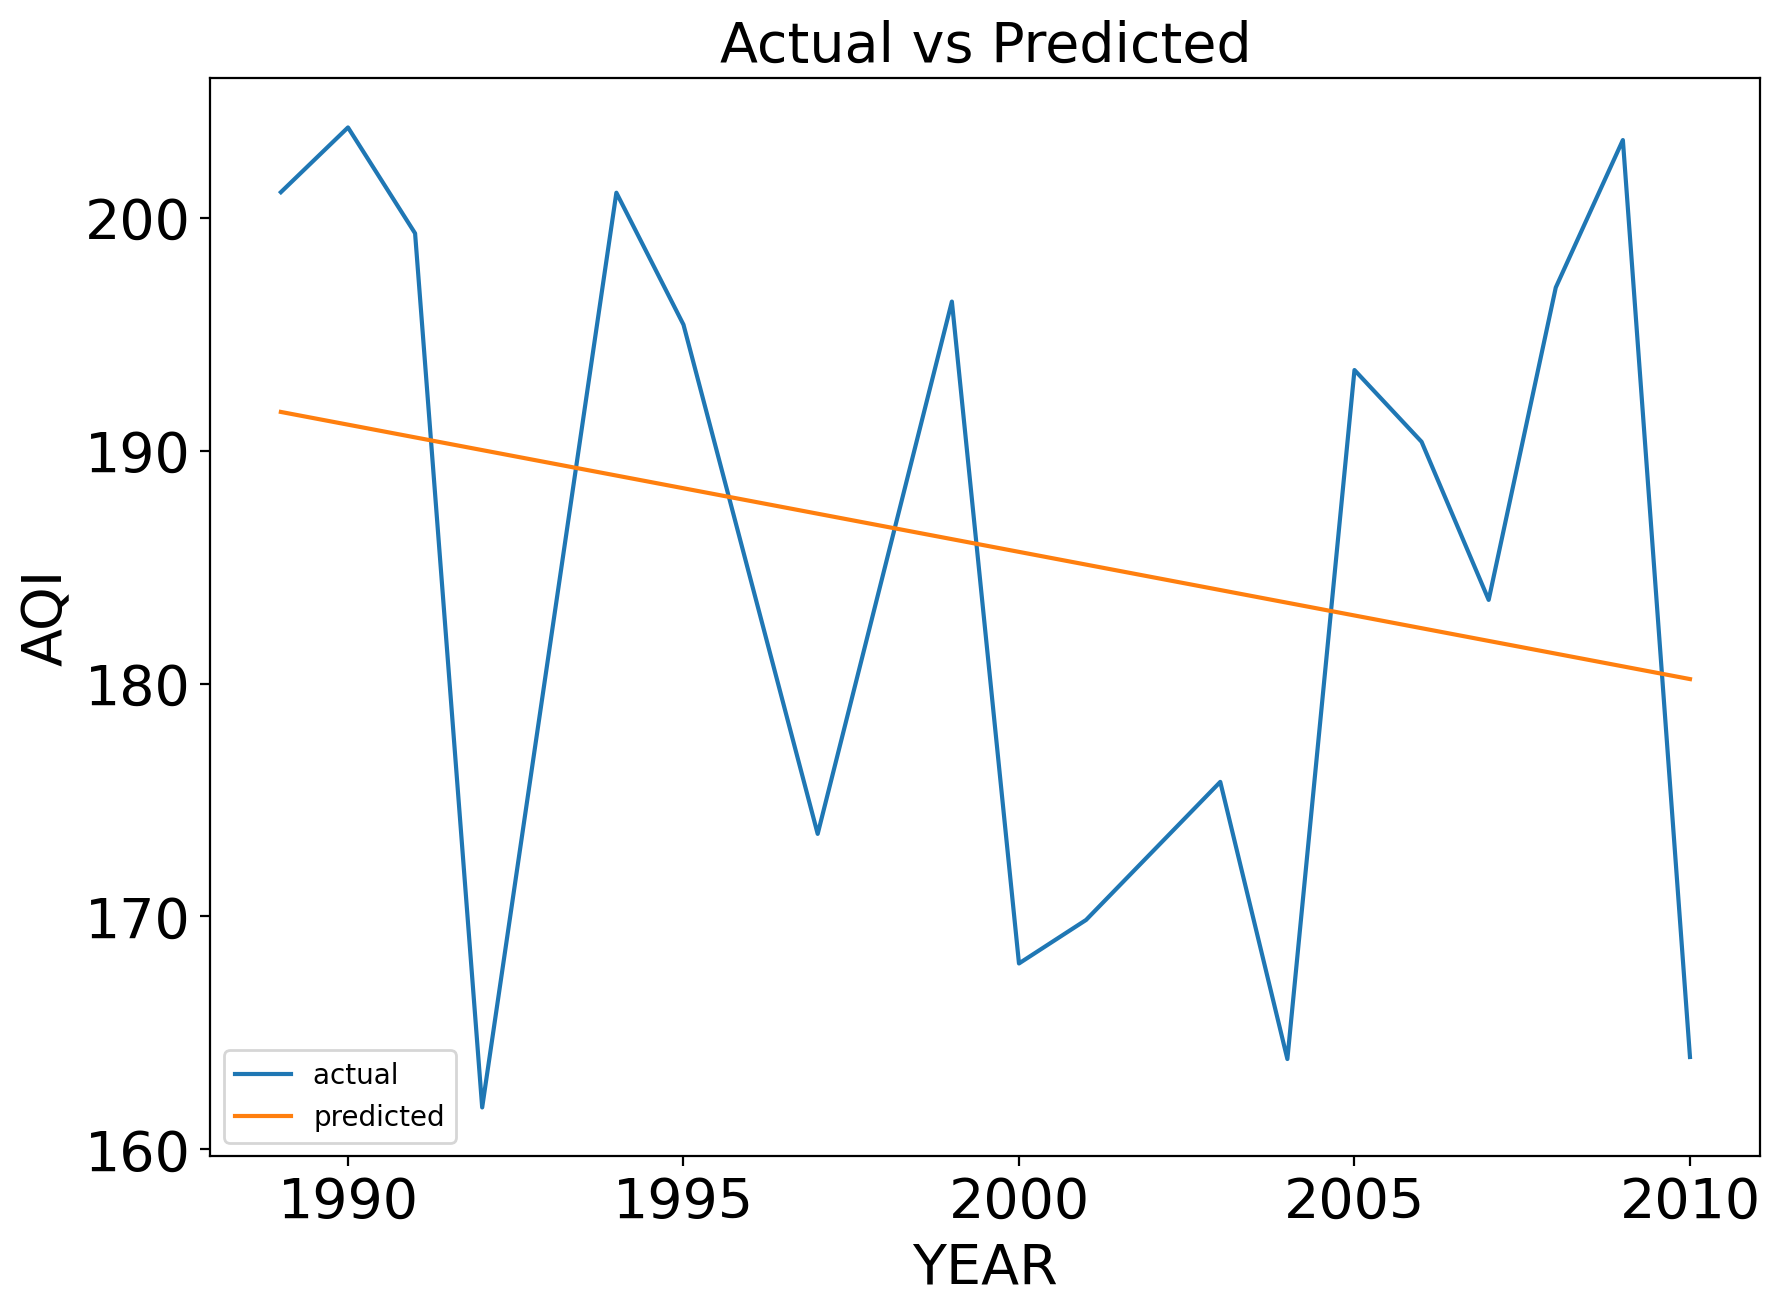

In [39]:
#Actual vs Predicted
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [40]:
#improving the accuracy by splitting the data on heavy variations
df= dd[['year','AQI']]
#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year>2010]
df.describe()

,year,AQI
count,5.000000,5.000000
mean,2013.000000,99.070145
std,1.581139,5.135595
min,2011.000000,95.334326
25%,2012.000000,96.328088
50%,2013.000000,97.279827
75%,2014.000000,98.375404
max,2015.000000,108.033081


<Axes: xlabel='AQI'>

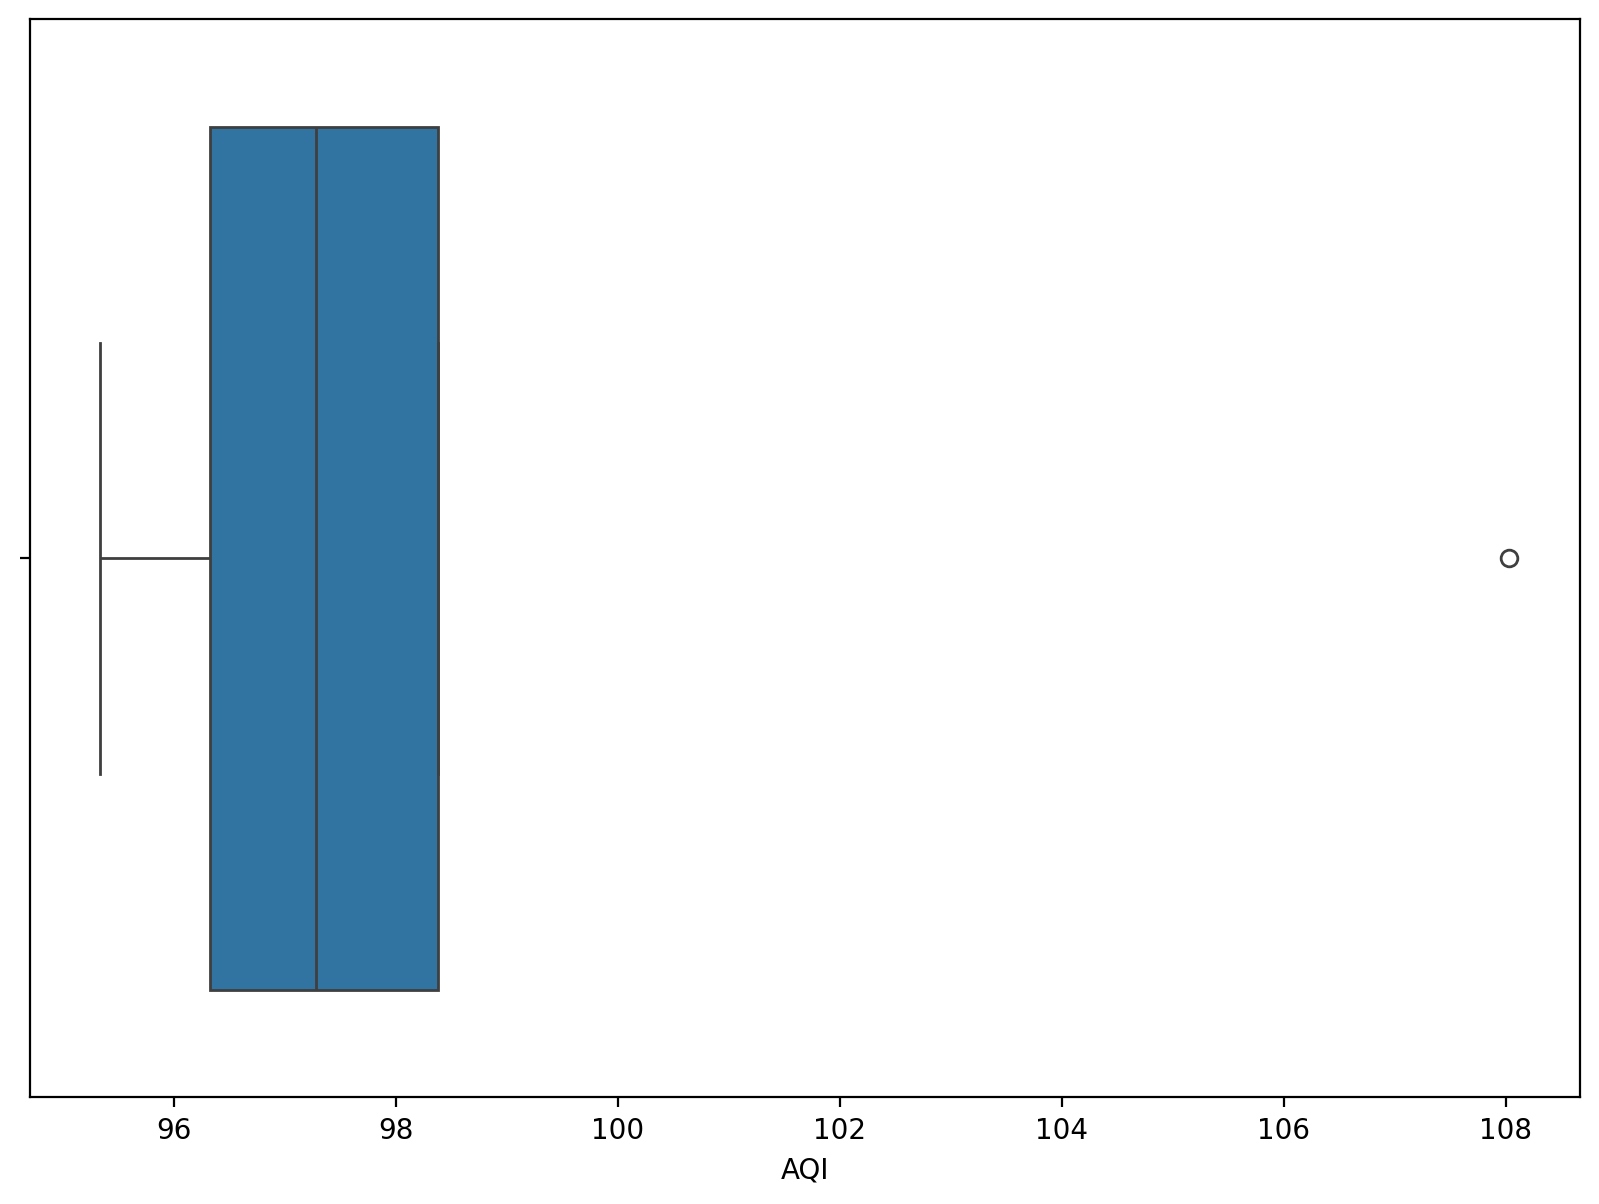

In [41]:
#applying boxplot
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [42]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >96.1]
df=df[df.AQI <98.5]
df.head()

,year,AQI
27,2014,96.328088
26,2013,97.279827
25,2012,98.375404


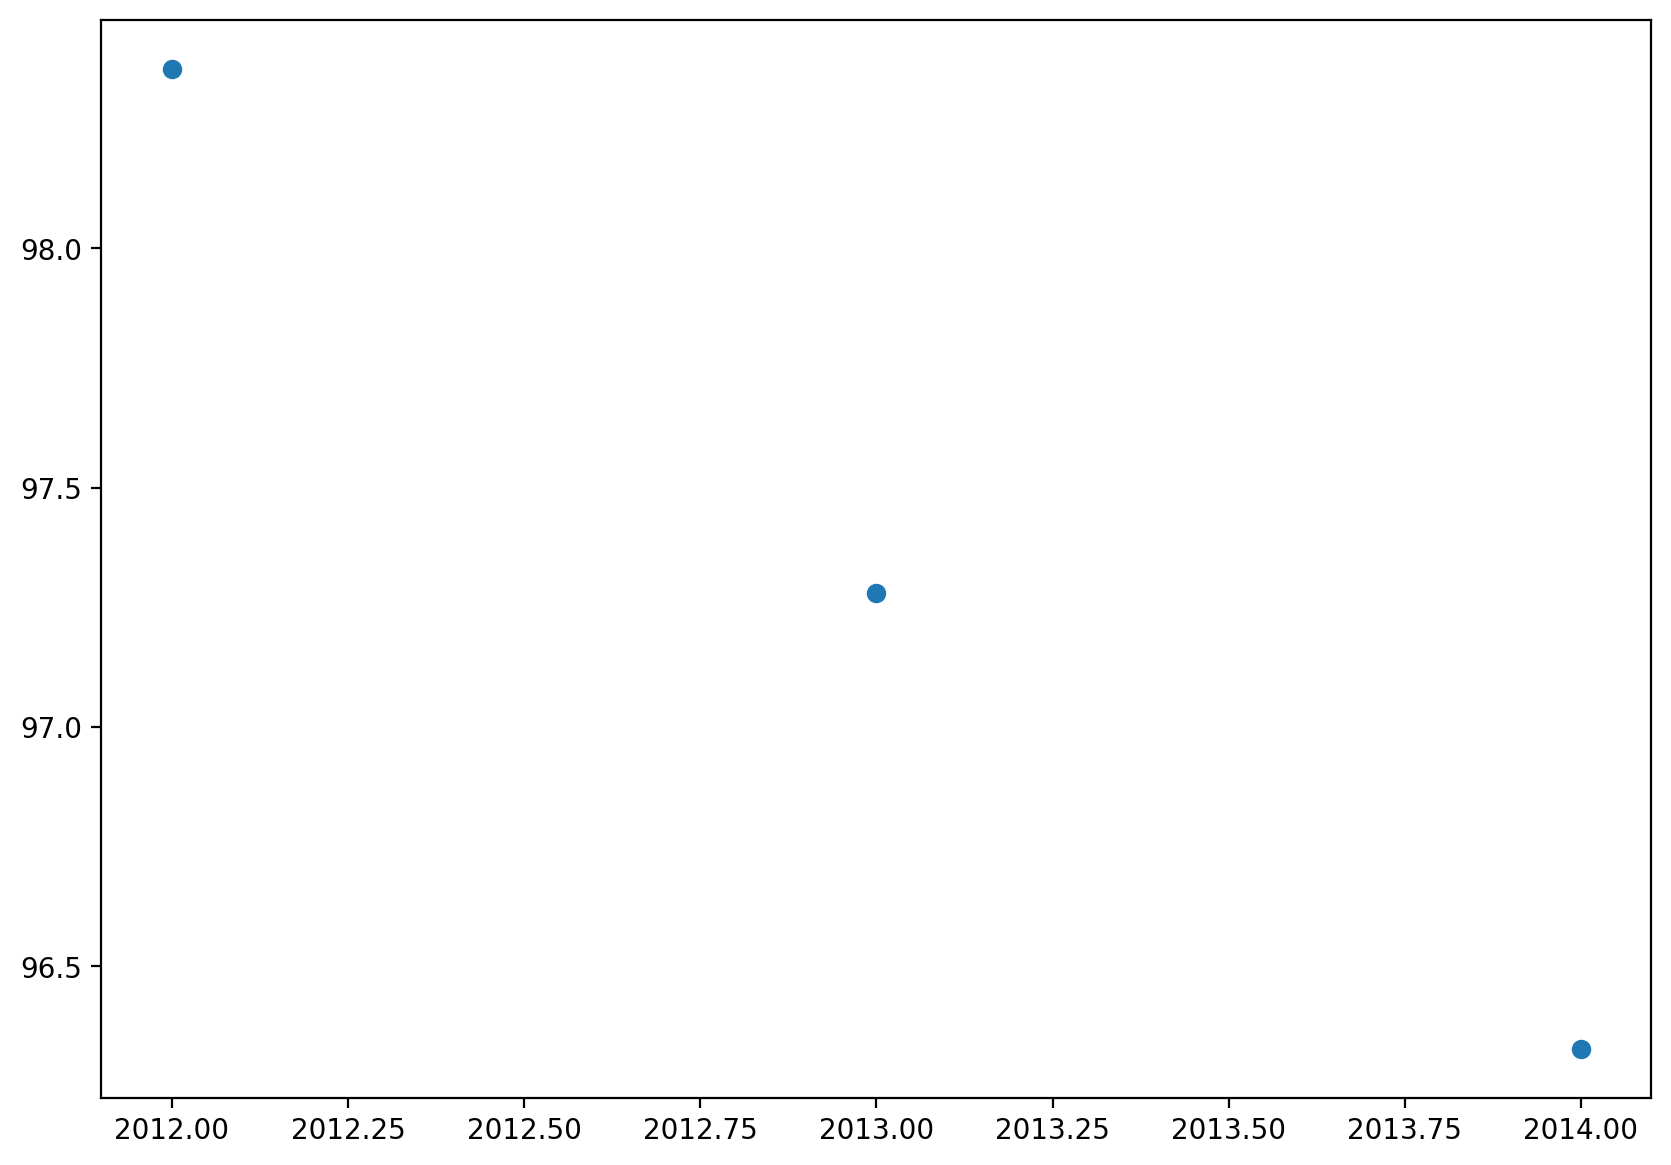

In [43]:
cols =['year']
y = df['AQI']
x=df[cols]
plt.scatter(x,y)
plt.show()

In [44]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.,  1.],
       [ 1.,  0.],
       [ 1., -1.]])

In [45]:
#Tunning model with GRADIENT DESCENT
alpha = 0.1
iterations = 3000
m = y.size
np.random.seed(4)
theta = np.random.rand(2)
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 97.33, -1.02


In [46]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[ 97.33, -1.02]
def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
x=pd.concat([df, dt], axis=1)
x

,year,AQI,Actual,Predicted
27,2014,96.328088,96.328088,96.31
26,2013,97.279827,97.279827,97.33
25,2012,98.375404,98.375404,98.35


In [47]:
#testing the accuracy of the model
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

0.03410699456487158


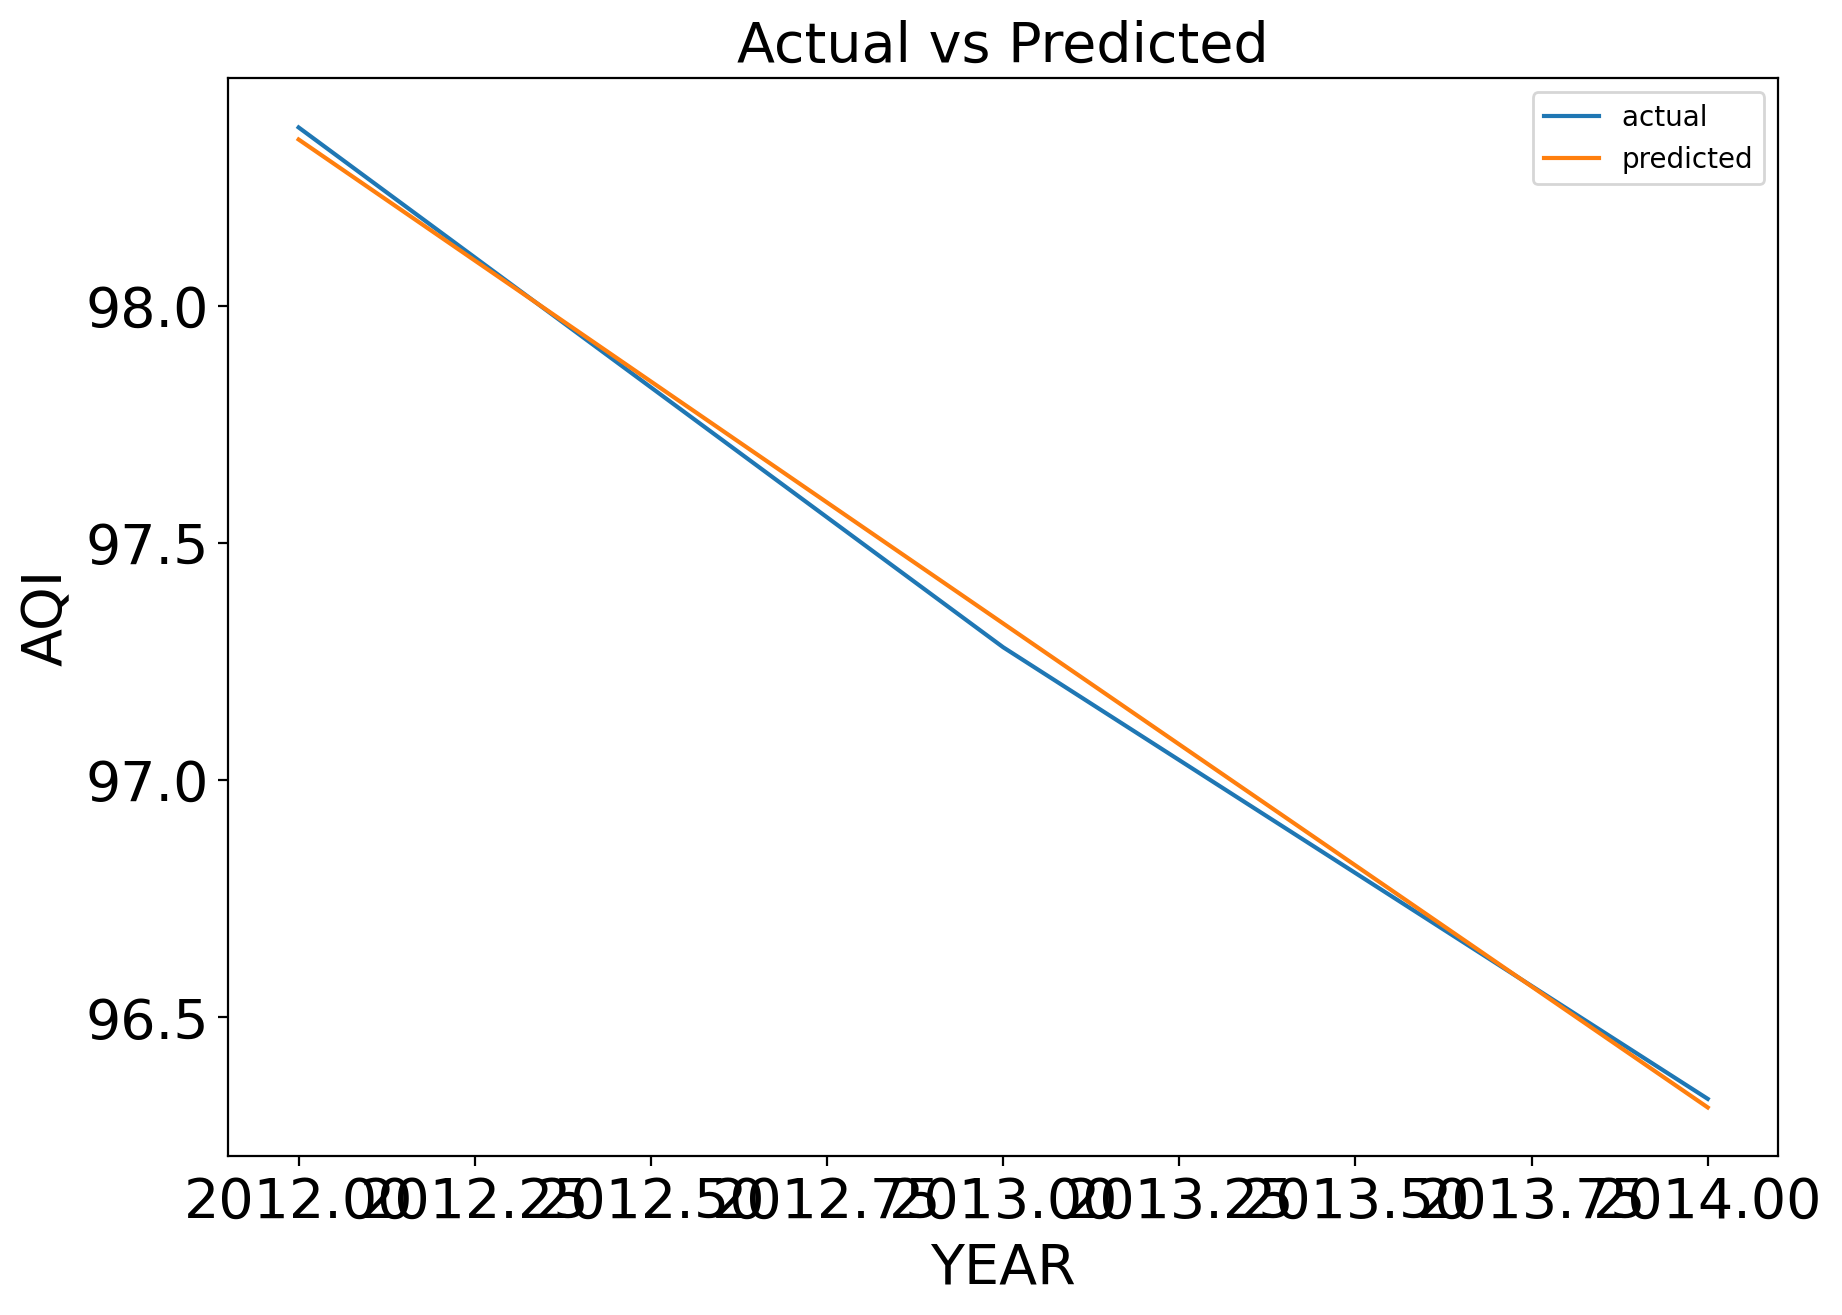

In [48]:
#plotting the actual and predicted results
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [50]:
#Prediction for the future
from sklearn.preprocessing import MinMaxScaler
#feeding in the x value-years
data=[[-1,2016],[-1,2017],[-1,2018],[-1,2019],[-1,2020],[-1,2021],[-1,2022],[-1,2023],[-1,2024]]
#normalization
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)
#calculations
newB=[97.33, -1.02]
ypred=-(x.dot(newB))

In [51]:
#Testing the model
#AQI for the year 2020
print("AQI for the year 2024 : ",ypred[-1])

AQI for the year 2024 :  98.35
